# Notes on Modulation

In [2]:
from loader import MetaCorpraInfo, CorpusInfo, PieceInfo
import plotting, util
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Define the meta-corpus to work with

metacorpora_path = 'petit_dcml_corpus/'
metacorpora = MetaCorpraInfo(metacorpora_path)

### 1. Chronological distribution of pieces in the meta-corpus

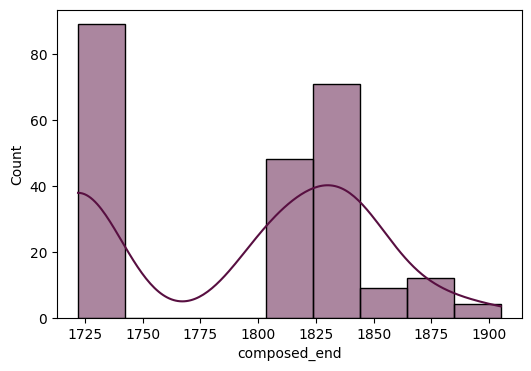

In [6]:
composed_years = metacorpora.get_corpora_concat_metadata_df(selected_keys=['corpus', 'fnames', 'composed_end'])


f, ax = plt.subplots(figsize=(6, 4))
# sns.histplot(data=composed_years, x='composed_end', stat='count', color='#4B0082', kde=True)
sns.histplot(data=composed_years, x='composed_end', stat='count', color='#580F41', kde=True)
plt.show()

### 2. Modulations count within a piece in the meta-corpus

Q: How many times does a piece modulate to another key?

In [9]:
# prepare the dataframe for plotting: [corpus, fname, composed_end, localkey_label, num_modulation]

modulation_df_list=[]
for idx, val in enumerate(metacorpora.corpus_name_list):
    corpus = CorpusInfo(corpus_path=metacorpora_path+val+'/')
    corpus_modulation_df = corpus.get_modulation_data_df()
    modulation_df_list.append(corpus_modulation_df)

modulation_data_df= pd.concat(modulation_df_list, ignore_index=True)


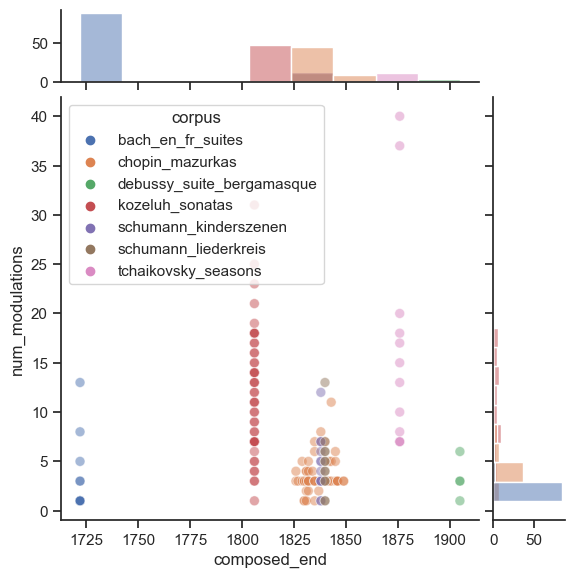

<Figure size 600x600 with 0 Axes>

In [12]:
# plots

sns.set_theme(style="ticks")

g=sns.JointGrid(data=modulation_data_df, x='composed_end', y='num_modulations',
                height = 6, hue='corpus', marginal_ticks=True, )
g.plot_joint(sns.scatterplot, s=50, alpha=0.5)
g.plot_marginals(sns.histplot)
plt.figure(figsize=(6, 6))
plt.show()

### 3. Distribution of modulations

   interval  count    year        era               corpus
0        -3      2  1722.0    Baroque    bach_en_fr_suites
1         4      1  1722.0    Baroque    bach_en_fr_suites
2         2      1  1722.0    Baroque    bach_en_fr_suites
0         1      3  1722.0    Baroque    bach_en_fr_suites
1        -1      2  1722.0    Baroque    bach_en_fr_suites
..      ...    ...     ...        ...                  ...
3        -2      2  1876.0  Late Rom.  tchaikovsky_seasons
4        -3      1  1876.0  Late Rom.  tchaikovsky_seasons
5        -1      1  1876.0  Late Rom.  tchaikovsky_seasons
0        -4      3  1876.0  Late Rom.  tchaikovsky_seasons
1         4      2  1876.0  Late Rom.  tchaikovsky_seasons

[514 rows x 5 columns]


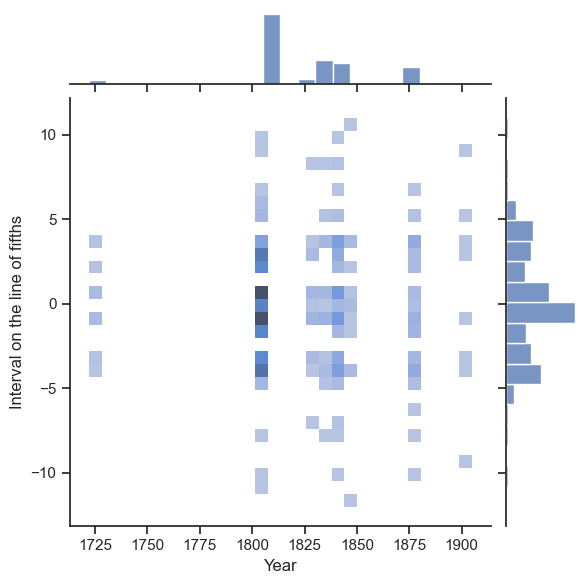

In [16]:
# jointplot of modulation steps distribution in the metacorpus

data = plotting.get_modulation_steps_data(data_source=metacorpora)
print(data)
g = sns.jointplot(data=data, x='year', y='interval', kind='hist', bins=30)
g.set_axis_labels('Year', 'Interval on the line of fifths')
plt.show()

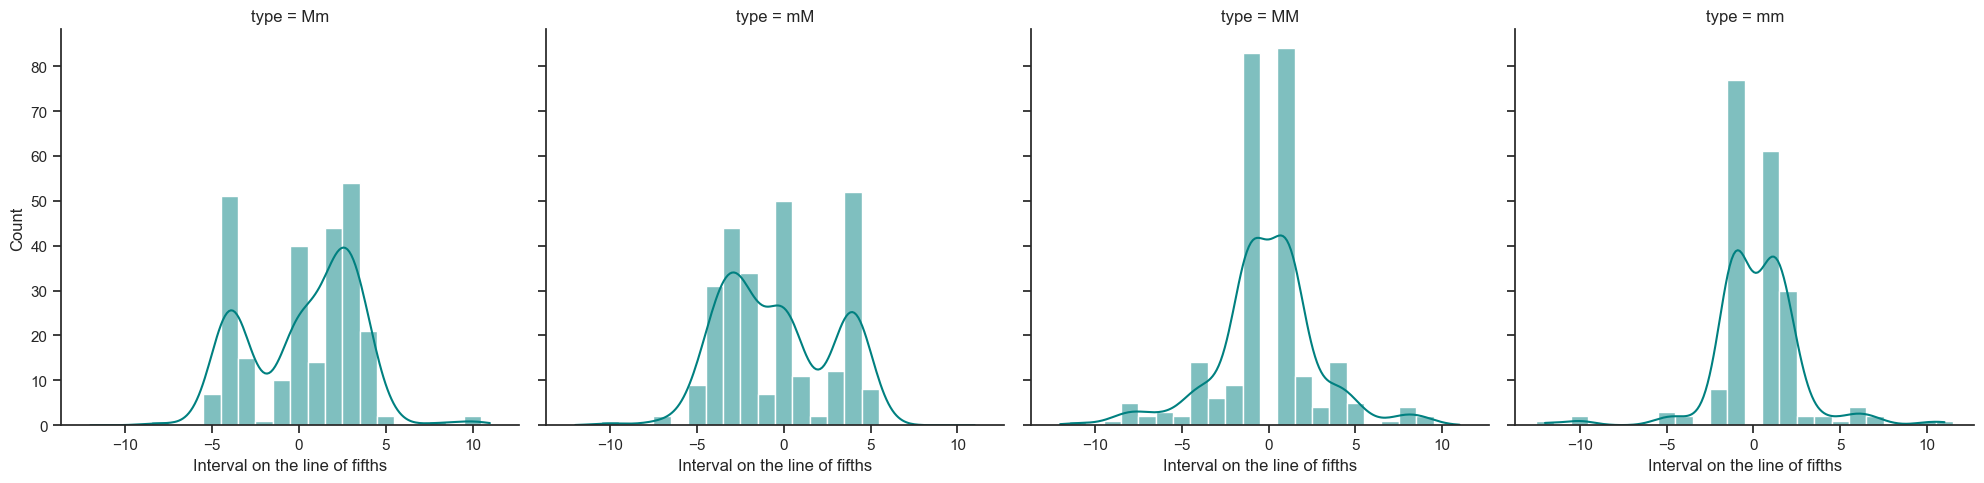

In [9]:
# View in 4 types of mode transitions
sns.set_theme(style="ticks")

data = plotting.get_modulation_steps_with_transition_types_data(metacorpora)
g=sns.displot(data=data, x='interval', col='type',  kind='hist',
              kde=True, discrete=True, color='#008080')

g.set_axis_labels("Interval on the line of fifths", "Count")


plt.show()

### Notes:

MM is the most prominent mode modulation(I modulates to V and IV).
